Simple linear regression using tensorflow Tapes

1. Start with a random value for weights **m** and **C**.
2. Use it to predict Y and compute the loss (mean squared error)
3. From m and C, subtract the partial derivative (of the loss function with respect to the weights) multiplied with a learning rate (α).

<p align='center'>
m=m–α∗(δJδm)
</p>
<p align='center'>c=c–α∗(δJδc)</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from dataset.create_dataset import create_dataset

In [2]:
# the training dataset

# linear
x_train = np.linspace(0, 10, 100)
y_train = x_train + np.random.normal(0,1,100)

# using kate's work
# X, Y = create_dataset(nb=10)
# x_train, y_train = X.to_numpy(), Y.to_numpy()

#using dataset created previously using kate's work
# data = pd.read_csv('dataset/dataset.csv')
# X, Y = data['X'], data['Y']
# x_train, y_train = X.to_numpy(), Y.to_numpy()

In [3]:
# declare weights
weight = tf.Variable(0.)
bias = tf.Variable(0.)

# Learning rate
learning_rate = 0.01

# Number of loops for training through all your data to update the parameters
training_epochs = 100

In [4]:
# Define linear regression expression y
def linreg(x):
    y = weight*x + bias
    return y

In [5]:
# Define loss function (MSE)
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [6]:
# train model
for epoch in range(training_epochs):
    # Compute loss within Gradient Tape context
    with tf.GradientTape() as tape:
        y_predicted = linreg(x_train)
        loss = squared_error(y_predicted, y_train)

        # Get gradients
        gradients = tape.gradient(loss, [weight,bias])

        # Adjust weights
        weight.assign_sub(gradients[0]*learning_rate)
        bias.assign_sub(gradients[1]*learning_rate)

        # Print output
        print(f"Epoch count {epoch}: Loss value: {loss.numpy()}")

Epoch count 0: Loss value: 33.610103607177734
Epoch count 1: Loss value: 4.001471519470215
Epoch count 2: Loss value: 1.0648235082626343
Epoch count 3: Loss value: 0.7735334038734436
Epoch count 4: Loss value: 0.7446131110191345
Epoch count 5: Loss value: 0.7417153716087341
Epoch count 6: Loss value: 0.7413987517356873
Epoch count 7: Loss value: 0.7413384914398193
Epoch count 8: Loss value: 0.7413038611412048
Epoch count 9: Loss value: 0.7412721514701843
Epoch count 10: Loss value: 0.7412409782409668
Epoch count 11: Loss value: 0.7412100434303284
Epoch count 12: Loss value: 0.7411794066429138
Epoch count 13: Loss value: 0.7411491274833679
Epoch count 14: Loss value: 0.7411192059516907
Epoch count 15: Loss value: 0.7410896420478821
Epoch count 16: Loss value: 0.741060197353363
Epoch count 17: Loss value: 0.7410311698913574
Epoch count 18: Loss value: 0.7410024404525757
Epoch count 19: Loss value: 0.740973949432373
Epoch count 20: Loss value: 0.7409456372261047
Epoch count 21: Loss value

In [7]:
print(weight.numpy())
print(bias.numpy())

0.9755512
0.09999572


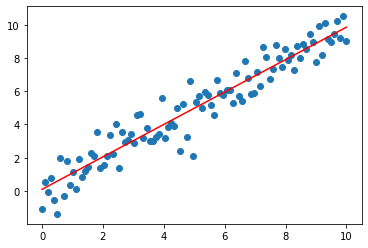

In [8]:
plt.scatter(x_train, y_train)
plt.plot(x_train, linreg(x_train), 'r')
plt.show()